In [2]:
import sys
import os
import datetime as dt
from math import radians, cos, sin, asin, sqrt
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# %pip install sweetviz
import sweetviz as sv

from distutils.filelist import findall
import re

In [3]:
ls = pd.read_csv('../data/interim/lonestar_cleaned.csv', header=0)

In [13]:
tasks_totals = ls.groupby(['Task', 'GliderClass'])[['Flight Duration (hr)', 'Distance']].sum().reset_index()
tasks_avg = ls.groupby(['Task', 'GliderClass'])[['Flight Duration (hr)', 'Distance']].mean().reset_index()

tasks_summary = tasks_totals.merge(tasks_avg, on=['Task', 'GliderClass'], suffixes=['_total', '_avg'])
tasks_summary

,Task,GliderClass,Flight Duration (hr)_total,Distance_total,Flight Duration (hr)_avg,Distance_avg
0,1,B,8.5,200.40,0.850000,20.040000
1,1,C,46.3,1501.01,3.307143,107.215000
2,1,D,33.8,1147.92,4.828571,163.988571
3,2,B,19.7,350.12,1.790909,31.829091
4,2,C,67.7,1782.37,4.835714,127.312143
5,2,D,30.0,808.68,4.285714,115.525714
6,3,B,31.7,522.75,2.641667,43.562500
7,3,C,56.0,992.37,4.000000,70.883571
8,3,D,38.2,727.74,5.457143,103.962857
9,4,B,10.5,68.24,1.166667,7.582222


Text(0.5, 1.0, 'Total distance flown per task by glider class')

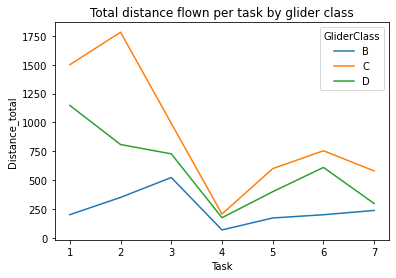

In [15]:
sns.lineplot(data=tasks_summary, x='Task', y='Distance_total', hue='GliderClass')
plt.title('Total distance flown per task by glider class')


Text(0.5, 1.0, 'Average distance flown per task by glider class')

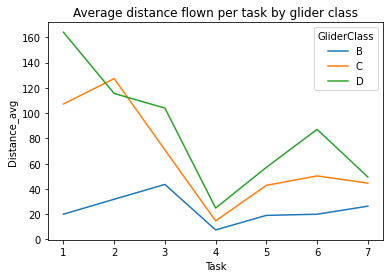

In [14]:
sns.lineplot(data=tasks_summary, x='Task', y='Distance_avg', hue='GliderClass')
plt.title('Average distance flown per task by glider class')


Hmmmm, it looks like the C class average distance was higher than the D class on task 2. Wonder why?
Some D class pilots didn't make goal and much distance. On the other hand, many C class pilot made goal or good distance.

In [17]:
ls.loc[ls['Task']==3, ['Pilot', 'GliderClass', 'Made Goal', 'Distance']]

,Pilot,GliderClass,Made Goal,Distance
63,Austin Kasserman,D,True,131.90
64,Tyler Burns,D,False,127.20
65,Shawn Scott,D,False,107.70
66,Felix Figueroa,D,False,105.86
67,Chris Lee,D,False,96.94
68,Max Montgomery,D,False,96.76
69,Rick Fullmer,C,False,91.74
70,Dustin Pachura,C,False,90.30
71,David Prentice,C,False,88.44
72,Josh Mcveigh,C,False,85.86


c:\Users\Gokcen\anaconda3\lib\site-packages\seaborn\categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Distance', ylabel='Task'>

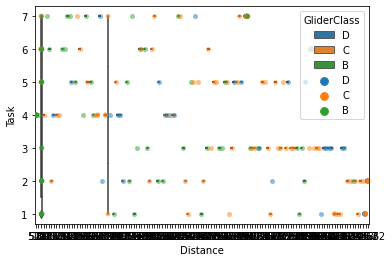

In [25]:
sns.boxplot(data=ls, y='Task', x='Distance', hue='GliderClass')
sns.stripplot(data=ls, y='Task', x='Distance', hue='GliderClass', 
            alpha=0.5, 
            jitter=True,
            split=True
            )